<a href="https://colab.research.google.com/github/rvishakhs/Deep_Learning/blob/main/Medical_Insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Basic Steps

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
# Loading the data frame
insurance_df = pd.read_csv('/content/drive/MyDrive/Deep Learning/Medical_insurance/insurance.csv')

In [3]:
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
insurance_df.shape

(1338, 7)

## One Hot encoding & Data Splitting


We got several categorical variables in our data set (sex, smoker, region) so we need to convert theese features into numercial terms in order to boost the performance of our model. One hot encoding is the simplest way to do that


In [10]:
# Let's try one hot encoding one our dataframe
insurance_df_encoded = pd.get_dummies(insurance_df, dtype='int64')

In [11]:
insurance_df_encoded

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [12]:
# Create X & Y variable (Features and Labels)
X = insurance_df_encoded.drop('charges', axis=1)
Y = insurance_df_encoded['charges']


In [13]:
X

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,1,0,0,1,0,0
1334,18,31.920,0,1,0,1,0,1,0,0,0
1335,18,36.850,0,1,0,1,0,0,0,1,0
1336,21,25.800,0,1,0,1,0,0,0,0,1


In [14]:
Y

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
...,...
1333,10600.54830
1334,2205.98080
1335,1629.83350
1336,2007.94500


In [15]:
# Create the training and test data
from sklearn.model_selection import train_test_split

In [16]:
# Now split the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

### Build the model

In [33]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model

insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
])

#Complie the model

insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                        metrics=['mae'])

#Fit the model

history = insurance_model.fit(X_train, Y_train, epochs=250)


Epoch 1/250
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 13118.5156 - mae: 13118.5156
Epoch 2/250
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11288.5117 - mae: 11288.5117
Epoch 3/250
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7930.6699 - mae: 7930.6699
Epoch 4/250
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7384.7305 - mae: 7384.7305
Epoch 5/250
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7307.5112 - mae: 7307.5112
Epoch 6/250
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7229.7632 - mae: 7229.7632
Epoch 7/250
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7151.9097 - mae: 7151.9097
Epoch 8/250
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7067.3140 - mae: 7067.3140
Epoch 9/250
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 6977.3003 - mae: 6977.3003
Epoch 10/250
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6882.4033 - mae: 6882.4033
Epoch 11/250
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6772.8921 - mae: 6772.8921
Epoch 12/250
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/s

In [31]:
# Evaluate the performance of our training dataset
insurance_model.evaluate(X_train, Y_train)

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3387.2686 - mae: 3387.2686


[3477.589111328125, 3477.589111328125]

In [32]:
# Evaluate the performance of our test dataset
insurance_model.evaluate(X_test, Y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3215.9111 - mae: 3215.9111 


[3168.49755859375, 3168.49755859375]

Text(0.5, 0, 'epochs')

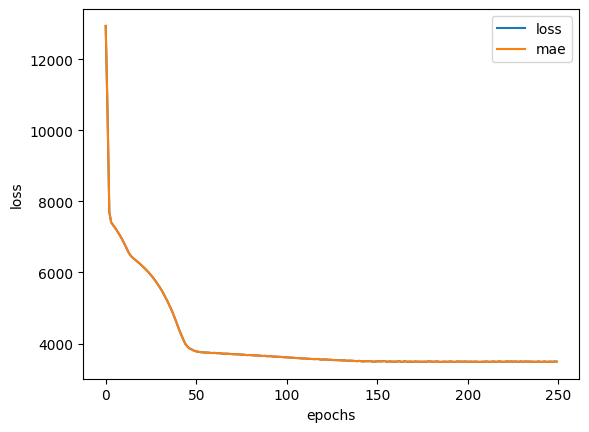

In [34]:
# Showing the training curve
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')